<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$X_{train}\in R^{N\times D},y_{train}\in R^{N}$$
$$X_{test}\in R^{M\times D},y_{test}\in R^{M}; M\leq N$$
- Primer momento cuando se entrena la red y se ajusta con $X_{train}$, se tienen las etiquetas $L$ mediante la funcion de activacion softmax 
$$L\in R^{N\times D}$$ 
las etiquetas $L$ se ajustan con la moda de $y_{train}$
$$L[i]=\mode(y_{train}[L=i]),\forall i=[1,2,..,n], n\in g$$
donde $g$ hace referencia a los grupos
- Segundo momento cuando ingresa un nuevo conjunto $X_{test}$, y con las probabilidades se tienen las etiquetas $L_{test}$
$$L_{test}\in R^{M\times D}$$ 

In [1]:
# Cargar base de datos sinteticas
#https://drive.google.com/file/d/17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB/view?usp=sharing
#id del archivo: 17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB

FILEID = "17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-07-31 22:52:40--  https://docs.google.com/uc?export=download&confirm=&id=17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB
Resolving docs.google.com (docs.google.com)... 172.217.212.138, 172.217.212.113, 172.217.212.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-ac-docs.googleusercontent.com/docs/securesc/eeqgg45haukj7hv6u9iu49soikibl1tv/q3b5ph4qe38s09oisc6ccmfjtfch52l8/1596235950000/11146100322577758036/14552234635389544300Z/17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB?e=download [following]
--2020-07-31 22:52:41--  https://doc-0c-ac-docs.googleusercontent.com/docs/securesc/eeqgg45haukj7hv6u9iu49soikibl1tv/q3b5ph4qe38s09oisc6ccmfjtfch52l8/1596235950000/11146100322577758036/14552234635389544300Z/17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB?e=download
Resolving doc-0c-ac-docs.googleusercontent.com (doc-0c-ac-docs.googleusercontent.com)... 172.217.214.132, 2607:f8b0:4001:c00::84
Connectin

In [2]:
import os
import sys
Path='/content/CKAPRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

In [8]:
!pip install tf-nightly
import numpy as np
import scipy.io as sio
from CKA_PRI import *
import tensorflow as tf
from joblib import dump,load
from sklearn import  datasets
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score,jaccard_score

# **Sinteticas**

**Prueba con Happy**
- Se realiza una prueba en happy con la base de datos fragmentados para probar el funcionamiento de la clase


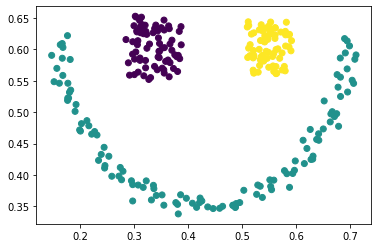

In [4]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

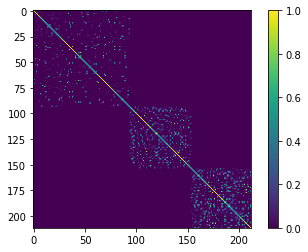

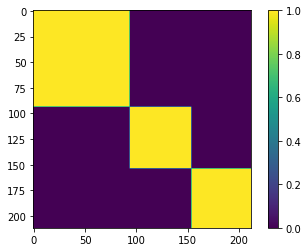

(212, 212)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    happy, labels_happy, test_size=0.2, stratify=labels_happy)
#ejemplo cálculo kernels con tfp
ind = np.argsort(y_train)
Xtrain = X_train[ind]
ytrain = y_train[ind]
xi = tf.convert_to_tensor(Xtrain.reshape(Xtrain.shape[0],-1),dtype=tf.float32)
yi = tf.convert_to_tensor(ytrain.reshape(-1,1),dtype=tf.float32)
#kernel gaussiano tfp
scalar_kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=0.01)
scalar_kernely = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=1e-13)
K = scalar_kernel.matrix(xi, xi)
plt.imshow(K.numpy())
plt.colorbar()
plt.show()

Ky = scalar_kernely.matrix(yi, yi)
plt.imshow(Ky.numpy())
plt.colorbar()
plt.show()
print(K.shape)

Epoch 1/100
4/4 [==============================] - 1s 280ms/step - loss: 1.2153
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1067
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0514
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0772
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0605
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9964
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9907
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9865
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9764
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9856
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9826
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9844
Epoch 13/100
4/4 [==============================] - 0s 2ms/

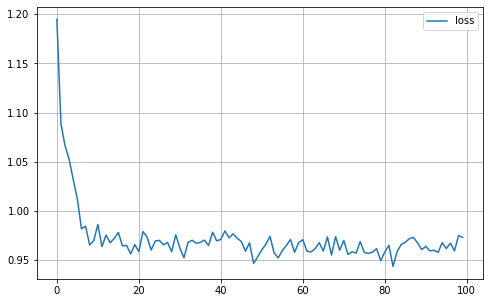

In [6]:
p = PRICKA(K=3,sigmay=0.03)
p.fit(Xtrain,ytrain/1.0)
labels_pre_ = p.predict(X_test)

Ari: 1.0 y accuracy: 1.0


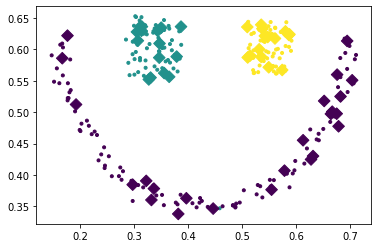

In [7]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=p.labels_, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_, marker='D',s=68)
Rari_=adjusted_rand_score(y_test,labels_pre_)
Racc_=accuracy_score(y_test,labels_pre_)
print('Ari: '+str(Rari_)+' y'+' accuracy: '+str(Racc_))

**Moons**
- dado que con la base de datos happy se logro comprobar el funcionamiento de la clase, con moons no se partiran los datos

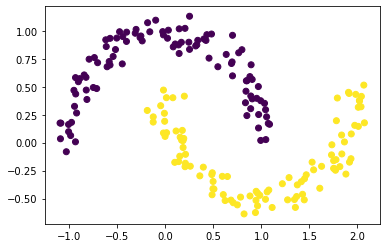

In [5]:
moons,labels_moons = datasets.make_moons(n_samples=200, noise=.085)
plt.scatter(moons[:,0],moons[:,1],c=labels_moons)
Xtrain=moons
ytrain=labels_moons

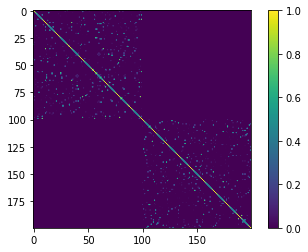

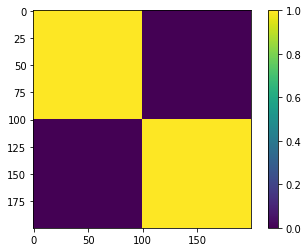

(200, 200)


In [9]:
ind = np.argsort(ytrain)
Xtrain = Xtrain[ind]
ytrain = ytrain[ind]
xi = tf.convert_to_tensor(Xtrain.reshape(Xtrain.shape[0],-1),dtype=tf.float32)
yi = tf.convert_to_tensor(ytrain.reshape(-1,1),dtype=tf.float32)
#kernel gaussiano tfp
scalar_kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=0.05)
scalar_kernely = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=1e-13)
K = scalar_kernel.matrix(xi, xi)
plt.imshow(K.numpy())
plt.colorbar()
plt.show()

Ky = scalar_kernely.matrix(yi, yi)
plt.imshow(Ky.numpy())
plt.colorbar()
plt.show()
print(K.shape)

Epoch 1/100
4/4 [==============================] - 1s 239ms/step - loss: 1.7056
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.2929
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.2043
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1998
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1432
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1644
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1775
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1704
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1792
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1518
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1599
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1614
Epoch 13/100
4/4 [==============================] - 0s 3ms/

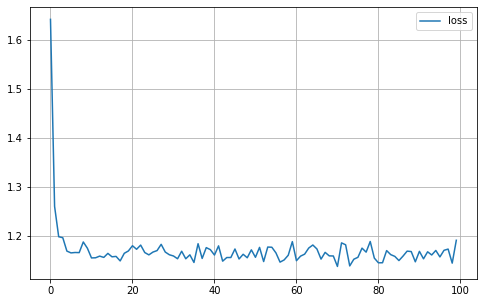

In [10]:
p = PRICKA(K=2,sigmay=0.8,lambda_=0.4)
p.fit(Xtrain,ytrain/1.0)
labels_pre_ = p.predict(Xtrain)

Ari: 0.1722671590413239 y accuracy: 0.71


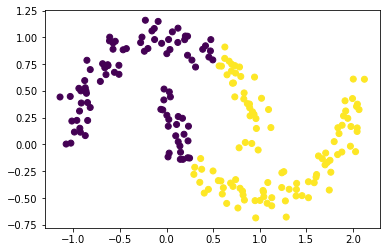

In [11]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=p.labels_)
Rari_=adjusted_rand_score(ytrain,p.labels_)
Racc_=accuracy_score(ytrain,p.labels_)
print('Ari: '+str(Rari_)+' y'+' accuracy: '+str(Racc_))

# **Reales**
- Para esta seccion se prueba con la base de datos de MNIST, debido al tamaño de la base de datos la misma es fragmentada  y se toman 2000 imagenes con sus respectivas etiquetas

11493376/11490434 [==============================] - 0s 0us/step


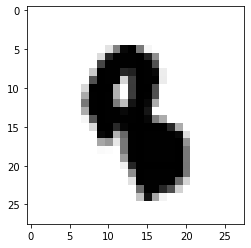

In [12]:
(Xtrain, ytrain), (Xtest, ytest) = tf.keras.datasets.mnist.load_data()
Xtrain, _, ytrain, _= train_test_split(Xtrain,ytrain, stratify=ytrain,train_size=2000) # 
Xtrain = Xtrain/255.0 #obligar a flotante normalizado 0 a 1
Xtest = Xtest/255.0
ytrain = ytrain/1.0
ytest = ytest/1.0
plt.imshow(Xtrain[0],cmap='binary')

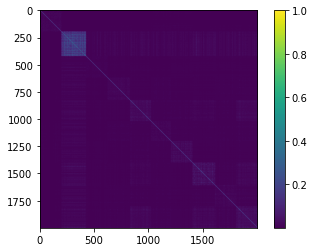

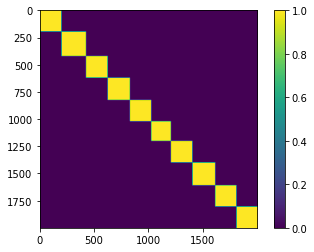

In [13]:
#ejemplo cálculo kernels con tfp
Xtrain = Xtrain.reshape(Xtrain.shape[0],-1)
Xtest = Xtest.reshape(Xtest.shape[0],-1)
ind = np.argsort(ytrain)
Xtrain = Xtrain[ind]
ytrain = ytrain[ind]
xi = tf.convert_to_tensor(Xtrain.reshape(Xtrain.shape[0],-1),dtype=tf.float32)
yi = tf.convert_to_tensor(ytrain.reshape(-1,1),dtype=tf.float32)
#kernel gaussiano tfp
scalar_kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=3)
scalar_kernely = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=1e-13)
K = scalar_kernel.matrix(xi, xi)
plt.imshow(K.numpy())
plt.colorbar()
plt.show()
Ky = scalar_kernely.matrix(yi, yi)
plt.imshow(Ky.numpy())
plt.colorbar()
plt.show()

Epoch 1/100
32/32 [==============================] - 1s 33ms/step - loss: 5.2322
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4838
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3673
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2986
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2697
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2589
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2061
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1992
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2012
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1787
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1974
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2124
Epoch 13/100
32/32 [================

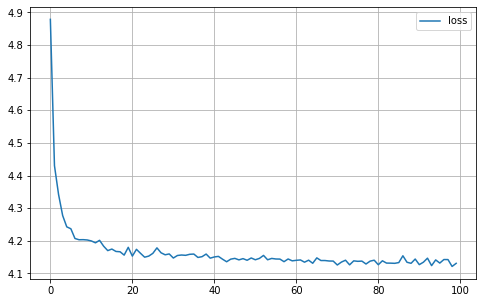

PRICKA(D=50, K=10, activation='softmax', batch_size=64, epochs=100, lambda_=0.1,
       sigmax=1, sigmay=10)

In [26]:
p = PRICKA(K=10,D=50,sigmay=10,lambda_=0.1)
p.fit(Xtrain,ytrain)


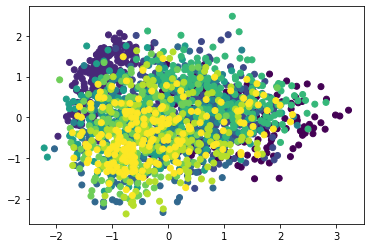

In [27]:
K=p.Kc
red = PCA(n_components=2)
zr = red.fit_transform(K)
plt.scatter(zr[:,0],zr[:,1],c=ytrain)
plt.show()

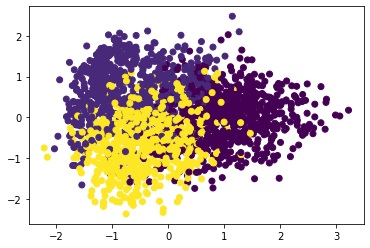

In [28]:
plt.scatter(zr[:,0],zr[:,1],c=p.labels_)

## **Busqueda mejores parametros**
### **Sinteticas**

In [6]:
n_clusters=3
steps =[[('rep', PRICKA())]]
parameters =[ {'rep__lambda_':[0.1,0.5,0.75,0.9],'rep__D':[20,50,100],'rep__sigmay':[0.03,0.1,0.5,3],'rep__K':[n_clusters],'rep__batch_size':[64,128]}]

it 1/10
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 15.0min finished


Epoch 1/100
4/4 [==============================] - 1s 268ms/step - loss: 1.1891
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1211
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1001
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0954
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0848
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0560
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0535
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0292
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0150
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0175
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0160
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0259
Epoch 13/100
4/4 [==============================] - 0s 3ms/

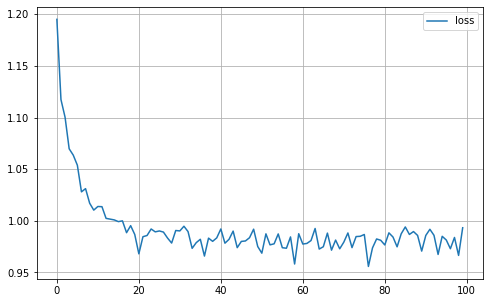

it 1/10
{'rep__D': 20, 'rep__K': 3, 'rep__batch_size': 64, 'rep__lambda_': 0.5, 'rep__sigmay': 0.03}
acc: 100.0
ari: 100.0


TypeError: ignored

In [9]:

for i in range(len(steps)):
    meth_name = ['CKAPRI']
    name='/content/CKAPRI/happy' + str(meth_name[i]) + '.joblib'
    Niter = 10 #numero particiones
    acc =np.zeros(Niter)#arreglo para guardar acierto
    ari=np.zeros(Niter)
    jacc=np.zeros(Niter)
    puri=np.zeros(Niter)
    Nc = len(np.unique(labels_happy))
    best_estimators= []#mejor metodo por iteracion
    best_parameters= []#mejor metodo por iteracion

    for j in range(Niter):
      print('it %d/%d'%(j+1,Niter))
      ## Accuracy
      X_train, X_test, y_train, y_test = train_test_split(happy,labels_happy,test_size=0.2, stratify=labels_happy)
      y_train=y_train/1.0
      grid_search = GridSearchCV(Pipeline(steps[i]) , parameters[i],cv=5,verbose=1,scoring='accuracy',n_jobs=-1)
      #generar mejor modelo
      grid_search.fit(X_train,y_train)
      #estimar salida conjunto de test
      y_pred = grid_search.best_estimator_.predict(X_test)
      #guardar mejor modelo
      best_estimators.append(grid_search.best_estimator_)
      best_parameters.append(grid_search.best_params_)
      #guardar acierto
      acc[j] = 100*accuracy_score(y_test,y_pred)
      ari[j]=100*adjusted_rand_score(y_test,y_pred)
      jacc[j]=100*jaccard_score(y_test,y_pred,average='weighted')
      puri[j]=100*purity_score(y_test,y_pred)
      #estimar matriz de confusion
      print('it %d/%d'%(j+1,Niter))
      print(grid_search.best_params_)
      print('acc:',acc[j])
      print('ari:',ari[j])
      #print('confusionmatrix \n',cmc[j])
      savedata = {
        'ari':ari,
        'acc':acc,
        'jacc':jacc,
        'puri':puri,
        'best_models':best_estimators,
        'best_parameters':best_parameters,
          } 
      dump(savedata,name)